In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

In [22]:
import pandas as pd
# The dataset changed a little in _r1: "acctime" used to be all 0:00:00. 
# In the revised csv `acctime` is converted to integer. 
# There's probably a number of entries that fall beyond 2359 (and possibly a few negative ones as well), so we'll have to clean those. 
df0 = pd.read_csv("../input/toronto-collisions-dataset-r1/involved2020_forinsight_r1.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (12,26,29,30,31,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# df0 is a mix of two datasets: "Collisions-Events" and "Collisions-Involved"
df0.head(10)

collision_no  accyear     accdate  acctime  longitude   latitude  \
0             1     2000  2000-09-11      850 -79.456317  43.727732   
1             1     2000  2000-09-11      850 -79.456317  43.727732   
2             2     2000  2000-09-11      850 -79.456271  43.727698   
3             2     2000  2000-09-11      850 -79.456271  43.727698   
4             2     2000  2000-09-11      850 -79.456271  43.727698   
5             2     2000  2000-09-11      850 -79.456271  43.727698   
6             3     2000  2000-01-02      630 -79.398357  43.706721   
7             3     2000  2000-01-02      630 -79.398357  43.706721   
8             3     2000  2000-01-02      630 -79.398357  43.706721   
9             4     2000  2000-01-02     1100 -79.395091  43.691344   

      stname1 streetype1 dir1                  stname2  ... driver_condition  \
0    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
1    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
2    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
3    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
4    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
5    YORKDALE         RD    W  401 C E YORKDALE W RAMP  ...              NaN   
6       YONGE         ST  NaN                 EGLINTON  ...           NORMAL   
7       YONGE         ST  NaN                 EGLINTON  ...              NaN   
8       YONGE         ST  NaN                 EGLINTON  ...           NORMAL   
9  1650 YONGE       Stre  NaN                      NaN  ...              NaN   

  pedestrian_action pedestrian_condition  pedestrian_collision_type  \
0               NaN                  NaN                        NaN   
1               NaN                  NaN                        NaN   
2               NaN                  NaN                        NaN   
3               NaN                  NaN                        NaN   
4               NaN                  NaN                        NaN   
5               NaN                  NaN                        NaN   
6               NaN                  NaN                        NaN   
7               NaN                  NaN                        NaN   
8               NaN                  NaN                        NaN   
9               NaN                  NaN                        NaN   

   cyclist_action cyclist_condition cyclist_collision_type  \
0             NaN               NaN                    NaN   
1             NaN               NaN                    NaN   
2             NaN               NaN                    NaN   
3             NaN               NaN                    NaN   
4             NaN               NaN                    NaN   
5             NaN               NaN                    NaN   
6             NaN               NaN                    NaN   
7             NaN               NaN                    NaN   
8             NaN               NaN                    NaN   
9             NaN               NaN                    NaN   

                            manoeuver posted_speed actual_speed  
0                        TURNING LEFT          NaN          NaN  
1                         GOING AHEAD          NaN          NaN  
2                                 NaN          NaN          NaN  
3                                 NaN          NaN          NaN  
4                       TURNING RIGHT          NaN          NaN  
5                                 NaN          NaN          NaN  
6                 SLOWING OR STOPPING          NaN          NaN  
7                                 NaN          NaN          NaN  
8                         GOING AHEAD          NaN          NaN  
9  PULLING AWAY FROM SHOULDER OR CURB          NaN          NaN  

[10 rows x 38 columns]

In [24]:
df0.shape

(2601712, 38)

In [25]:
df0.columns

Index(['collision_no', 'accyear', 'accdate', 'acctime', 'longitude',
       'latitude', 'stname1', 'streetype1', 'dir1', 'stname2', 'streetype2',
       'dir2', 'stname3', 'streetype3', 'dir3', 'road_class', 'visibility',
       'light', 'road_surface_cond', 'traffic_control', 'vehicle_no',
       'vehicle_class', 'initial_dir', 'impact_type', 'involved_class',
       'involved_injury_class', 'safety_equip_used', 'driver_action',
       'driver_condition', 'pedestrian_action', 'pedestrian_condition',
       'pedestrian_collision_type', 'cyclist_action', 'cyclist_condition',
       'cyclist_collision_type', 'manoeuver', 'posted_speed', 'actual_speed'],
      dtype='object')

In [26]:
# This shows the number of collisions itself (NOT the number of people involved in the collisions)
df0['collision_no'].nunique()

1038398

In [27]:
# Create df1 from df0
df1 = df0.copy()
# Add new column 'acc_date'
df1['acc_date'] = pd.to_datetime(df0['accdate'], errors = 'raise')
# Drop columns 'accdate' and 'accyear'
df1.drop(['accdate', 'accyear'], axis=1, inplace=True)

In [28]:
df1['acc_date'].dt.year.unique() 

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [29]:
df1['involved_injury_class'].unique()

array(['NONE', 'MINIMAL', nan, 'MINOR', 'FATAL', 'MAJOR'], dtype=object)

In [30]:
print('{:,}'.format(df1['involved_injury_class'].isna().sum()), 
      'data points in "involved_injury_class" are nan, which will be removed.')
df1.dropna(subset=['involved_injury_class'], inplace=True)

137,349 data points in "involved_injury_class" are nan, which will be removed.


In [31]:
df1['involved_class'].unique()

array(['DRIVER', 'PASSENGER', 'VEHICLE OWNER', nan, 'OTHER',
       'OTHER PROPERTY OWNER', 'TRUCK DRIVER', 'PEDESTRIAN', 'CYCLIST',
       'WITNESS', 'MOTORCYCLE DRIVER', 'RUNAWAY - NO DRIVER',
       'WHEELCHAIR', 'IN-LINE SKATER', 'MOPED DRIVER', 'UNKNOWN - FTR',
       'DRIVER - NOT HIT', 'TRAILER OWNER', 'MOTORCYCLE PASSENGER',
       'CYCLIST - NOT HIT', 'MOPED PASSENGER', 'CYCLIST PASSENGER',
       'ANIMAL', 'PEDESTRIAN - NOT HIT'], dtype=object)

In [32]:
print('{:,}'.format(df1['involved_class'].isna().sum()), 
      'data points in "involved_class" are nan, which will be removed.')
df1.dropna(subset=['involved_class'], inplace=True)

12,228 data points in "involved_class" are nan, which will be removed.


In [33]:
print('{:,}'.format(df1['longitude'].isna().sum()), 
      'data points in "longitude" are nan, which will be removed.')
df1.dropna(subset=['longitude'], inplace=True)

21 data points in "longitude" are nan, which will be removed.


In [34]:
df1['latitude'].isna().sum()

0

In [35]:
# Drop points whose lon-lat are not in Toronto (spatial outlier)
# Toronto lon-lat ranges:
# longitude: (-79.65 , -79.08)
# latitude: (43.57 , 43.85)

i = df1[(df1['longitude']<-79.65) | (df1['longitude']>-79.08) | (df1['latitude']<43.57) | (df1['latitude']>43.85)].index
df1.drop(i, inplace=True)

print('There were {:,} spatial outliers which are removed now.'.format(i.size))

There were 2,421 spatial outliers which are removed now.


In [36]:
# Add new columns to df1
df1['# involved'] = int(1)

df1['# injured'] = int(0)
df1.loc[df1['involved_injury_class'].isin(['MINIMAL', 'MINOR', 'MAJOR']), ['# injured']] = int(1) 

df1['# fatalities'] = int(0)
df1.loc[df1['involved_injury_class']=='FATAL', ['# fatalities']] = int(1) 

In [37]:
# Create dfE: the dataframe of "Collisions-Events" from df1

# We don't include the following columns which are related to "Collisions-Involved" except 'involved_class' and involved_injury_class': 
#                                     'traffic_control', 'vehicle_no', 'vehicle_class', 'initial_dir', 'impact_type', 'safety_equip_used', 
#                                     'driver_action','driver_condition', 
#                                     'pedestrian_action', 'pedestrian_condition', 'pedestrian_collision_type', 
#                                     'cyclist_action', 'cyclist_condition', 'cyclist_collision_type', 
#                                     'manoeuver', 'posted_speed', 'actual_speed'.

# Also we don't iclude the following columns which are not going to be useful for our analysis although they belong to "Collisions-Events":
#                                     'stname1', 'streetype1', 'dir1', 'stname2', 'streetype2', 'dir2', 'stname3', 'streetype3', 'dir3'.

dfE = df1.groupby(['collision_no', 'acc_date', 'acctime', 'longitude','latitude',
                   'road_class', 'road_surface_cond', 'visibility', 'light']).\
agg({'involved_class': ', '.join,
     'involved_injury_class': ', '.join,
    '# involved':'sum',
    '# injured': 'sum',
    '# fatalities': 'sum'})

dfE.reset_index(inplace=True)

When preparing to share maps or layers on the Web, it is recommended to reproject your source data to the **Web Mercator** coordinate system. Doing so will ensure that your map data is located correctly and aligns properly with other services such as popular content providers Microsoft® Bing™ Maps, Google Maps™, and ESRI® ArcGISSM Online, which have standardized their services on the Web Mercator coordinate system.

In [38]:
import datashader as ds
from datashader.utils import lnglat_to_meters

# Project longitude and latitude onto web mercator plane
dfE.loc[:, 'X'], dfE.loc[:, 'Y'] = lnglat_to_meters(dfE['longitude'], dfE['latitude'])

In [39]:
# Change the order of columns
cols = dfE.columns.tolist() 
new_cols = cols[0:5] + [cols[14]] + [cols[15]] + cols[5:14]
dfE = dfE.reindex(columns=new_cols)
dfE

collision_no   acc_date  acctime  longitude   latitude             X  \
0                  1 2000-09-11      850 -79.456317  43.727732 -8.845037e+06   
1                  2 2000-09-11      850 -79.456271  43.727698 -8.845032e+06   
2                  3 2000-01-02      630 -79.398357  43.706721 -8.838585e+06   
3                  4 2000-01-02     1100 -79.395091  43.691344 -8.838221e+06   
4                  5 2000-01-02     1125 -79.370090  43.656146 -8.835438e+06   
...              ...        ...      ...        ...        ...           ...   
990856       1038394 2019-02-24     1845 -79.319599  43.768005 -8.829817e+06   
990857       1038395 2019-10-20     1437 -79.587139  43.668288 -8.859600e+06   
990858       1038396 2019-05-10     2200 -79.351940  43.677554 -8.833418e+06   
990859       1038397 2019-07-20     2236 -79.314602  43.678378 -8.829261e+06   
990860       1038398 2019-10-08      938 -79.372333  43.651519 -8.835688e+06   

                   Y      road_class road_surface_cond visibility  \
0       5.423404e+06  Minor Arterial               DRY      CLEAR   
1       5.423399e+06  Minor Arterial               DRY      CLEAR   
2       5.420168e+06  Major Arterial               WET       RAIN   
3       5.417801e+06  Major Arterial               WET       RAIN   
4       5.412383e+06  Minor Arterial               WET       RAIN   
...              ...             ...               ...        ...   
990856  5.429610e+06  Major Arterial        LOOSE SNOW       SNOW   
990857  5.414252e+06           Local               DRY      CLEAR   
990858  5.415678e+06  Major Arterial               DRY      CLEAR   
990859  5.415805e+06  Minor Arterial               WET       RAIN   
990860  5.411671e+06  Major Arterial               DRY      CLEAR   

                   light                                     involved_class  \
0               DAYLIGHT                                     DRIVER, DRIVER   
1               DAYLIGHT  PASSENGER, PASSENGER, VEHICLE OWNER, VEHICLE O...   
2                   DARK                      DRIVER, VEHICLE OWNER, DRIVER   
3               DAYLIGHT                                     DRIVER, DRIVER   
4               DAYLIGHT       VEHICLE OWNER, DRIVER, VEHICLE OWNER, DRIVER   
...                  ...                                                ...   
990856  DARK, ARTIFICIAL    DRIVER, PASSENGER, DRIVER, PASSENGER, PASSENGER   
990857          DAYLIGHT                                     DRIVER, DRIVER   
990858  DARK, ARTIFICIAL                  DRIVER, DRIVER, DRIVER, PASSENGER   
990859  DARK, ARTIFICIAL                                             DRIVER   
990860          DAYLIGHT                                 PEDESTRIAN, DRIVER   

                  involved_injury_class  # involved  # injured  # fatalities  
0                            NONE, NONE           2          0             0  
1          MINIMAL, MINIMAL, NONE, NONE           4          2             0  
2                      NONE, NONE, NONE           3          0             0  
3                            NONE, NONE           2          0             0  
4                NONE, NONE, NONE, NONE           4          0             0  
...                                 ...         ...        ...           ...  
990856  NONE, NONE, NONE, NONE, MINIMAL           5          1             0  
990857                       NONE, NONE           2          0             0  
990858         MAJOR, NONE, NONE, MINOR           4          2             0  
990859                             NONE           1          0             0  
990860                      MINOR, NONE           2          1             0  

[990861 rows x 16 columns]

In [40]:
# calculate plot's boundary
x_center = (dfE['X'].max() + dfE['X'].min())/2
y_center = (dfE['Y'].max() + dfE['Y'].min())/2
x_half_range = (dfE['X'].max() - dfE['X'].min())/2
y_half_range = (dfE['Y'].max() - dfE['Y'].min())/2
x_range = (x_center - x_half_range, x_center + x_half_range)
y_range = (y_center - y_half_range, y_center + y_half_range)

sw = (x_range[0], y_range[0])
ne = (x_range[1], y_range[1])
boundary = zip(sw,ne)  # Create zip object with ranges

plot_width = int(1024)
# calculate plot's height from its width
plot_height = int(plot_width/(x_half_range/y_half_range))

In [41]:
from functools import partial
from datashader.utils import export_image
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

In [42]:
background = 'black'

# We set up partial objects “export” and “cm”:
    # “export” helps to export the plot created to a predetermined path, while 
    #  “cm” helps with the color mapping.
export = partial(export_image, background=background, export_path='export_SDH')
cm = partial(colormap_select, reverse=(background!='black'))

display(HTML('<style>.container {width:100% !important; }</style>'))

In [43]:
cvs = ds.Canvas(plot_width, plot_height, *boundary)
agg = cvs.points(dfE, 'X', 'Y')

# The cvs object ds.Canvas() is set up with predetermined widths and heights. The boundary object containing the bounds of the map are also passed in.
# Points are generated on the canvas using the X, Y pair passed in.

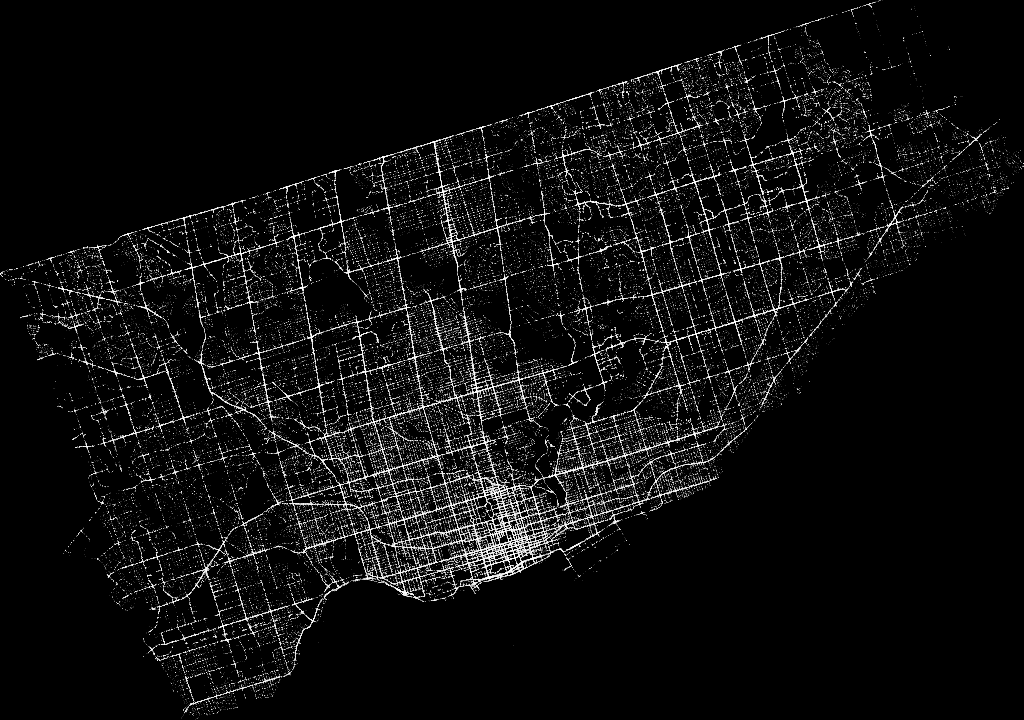

In [44]:
# Now that the setup is complete, we can start plotting and exporting the plots with a single line of code as shown below. 
# Color maps, normalizations are all parameters that can be readily changed.
export(tf.shade(agg, cmap=cm(Greys9, 0.2), how='eq_hist'), "TorontoCollisions_grey")

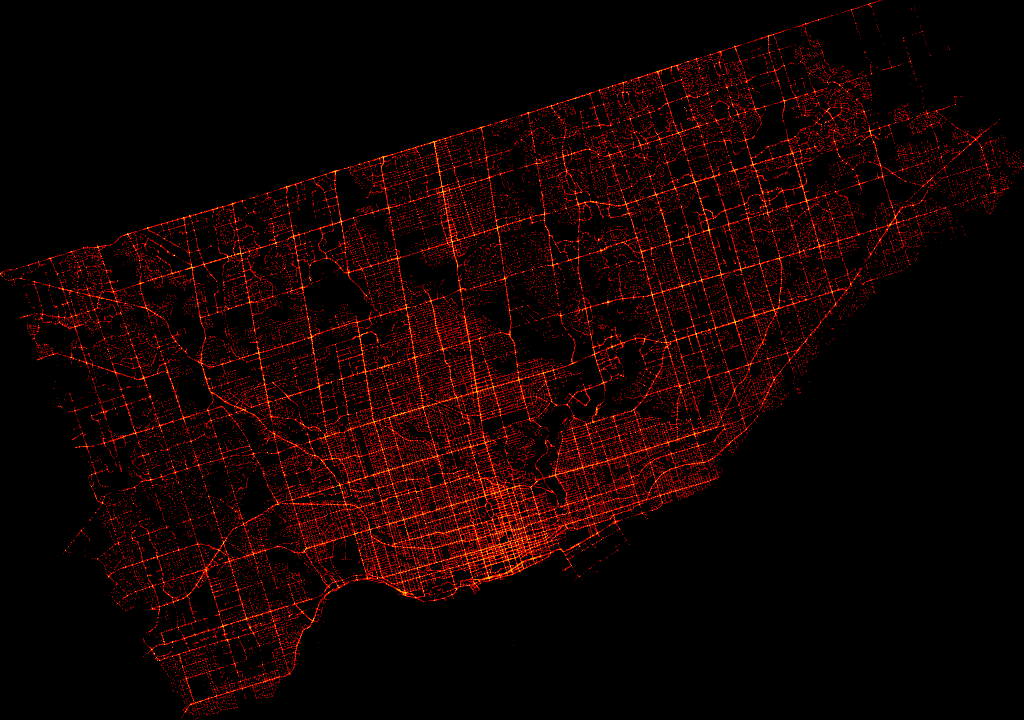

In [45]:
from colorcet import fire
export(tf.shade(agg, cmap=cm(fire, 0.2), how='log'), "TorontoCollisions_fire")

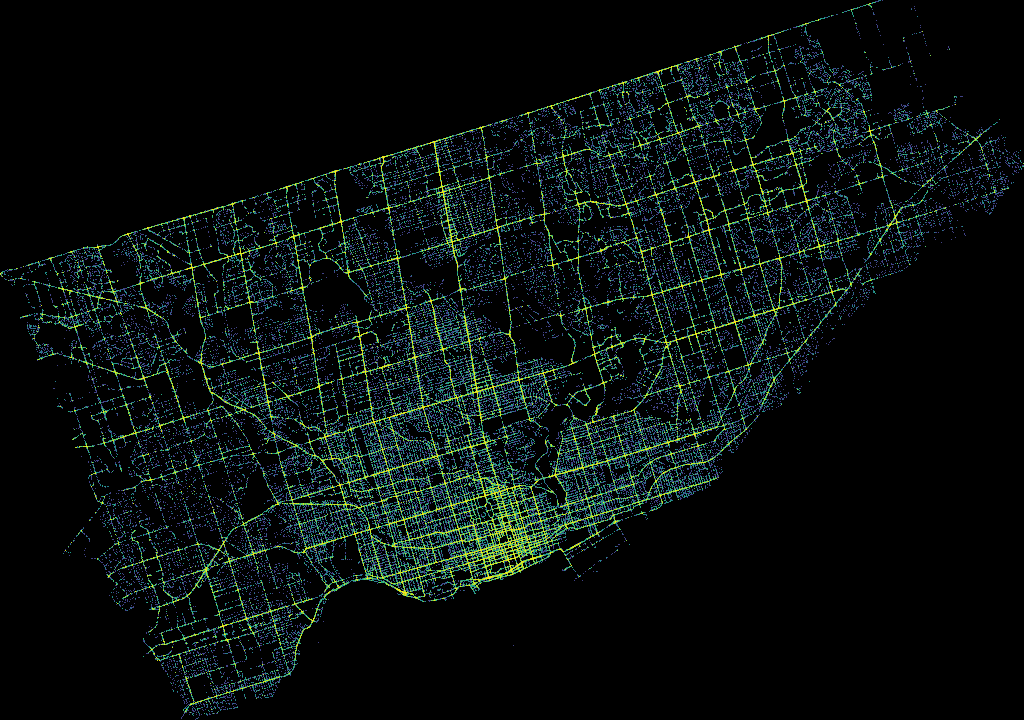

In [46]:
export(tf.shade(agg, cmap=cm(viridis, 0.2), how='eq_hist'), "TorontoCollisions_viridis")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
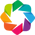

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [X,Y]   (R,G,B,A)

In [47]:
# Enough with the black background though. How would you overlay these points on an actual map?

import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(dfE, ['X', 'Y'])
accidents  = datashade(points, x_sampling=10, y_sampling=10, cmap=fire, width=900, height=480)

map_tiles * accidents

In [48]:
# Create a new dataframe from dfE for some visualization
Year = []
num_collisions = []
num_involved = []
num_injured = []
num_fatalities = []
for i, year in enumerate(dfE['acc_date'].dt.year.unique()):
    Year.append(year)
    num_col = dfE[dfE['acc_date'].dt.year==year]['collision_no'].count()
    num_collisions.append(num_col)
    num_inv = dfE[dfE['acc_date'].dt.year==year]['# involved'].sum()
    num_involved.append(num_inv)
    num_inj = dfE[dfE['acc_date'].dt.year==year]['# injured'].sum()
    num_injured.append(num_inj)
    num_fat = dfE[dfE['acc_date'].dt.year==year]['# fatalities'].sum()
    num_fatalities.append(num_fat)

dfE_g = {'year':Year,'# collisions':num_collisions,'# involved':num_involved,'# injured':num_injured, '# fatalities':num_fatalities}
dfE_g = pd.DataFrame(dfE_g)
dfE_g

year  # collisions  # involved  # injured  # fatalities
0   2000         64498      163410      23326            60
1   2001         57898      152461      22203            55
2   2002         57787      150161      22715            96
3   2003         53309      143195      20356            71
4   2004         45797      125153      16840            65
5   2005         44263      118332      15767            57
6   2006         43214      114488      15732            51
7   2007         46885      119209      14967            49
8   2008         48125      116204      14240            50
9   2009         47091      112487      15276            46
10  2010         48304      116574      16847            42
11  2011         46680      110071      14049            33
12  2012         44033      103646      13739            40
13  2013         44589      106640      13612            63
14  2014         46153      111605      14674            51
15  2015         47740      115969      13433            63
16  2016         52664      102742      14618            76
17  2017         55956      100362      14411            61
18  2018         59822      103527      14460            59
19  2019         36053       60762       9261            58

In [49]:
import plotly.graph_objects as go
# plotply problem in notebook: sometimes when you close the window and reopen it, your plots render as blank spaces. 
# --> Safely run the following code in a Notebook at any time and it should restore your figures:
import plotly.io as pio
pio.renderers.default='notebook'

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=dfE_g['year'], y=dfE_g['# collisions'],
                         mode='lines+markers',
                         name=''))
fig.update_layout(title='Number of Collisions in Toronto',
                  xaxis=dict(
                      title='Year',
                      tickmode = 'linear',
                      tick0 = 2000,
                      dtick = 1), 
                  yaxis=dict(
                      title='',
                      tickmode = 'linear',
                      tick0 = 35000,
                      dtick = 2000))
fig.show()

In [50]:
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=dfE_g['year'], y=dfE_g['# injured'],
                         mode='lines+markers',
                         name='',
                         line_color='sandybrown'))
fig.update_layout(title='Number of People Injured in Toronto Collisions',
                  xaxis=dict(
                      title='Year',
                      tickmode = 'linear',
                      tick0 = 2000,
                      dtick = 1), 
                  yaxis=dict(
                      title='',
                      tickmode = 'linear',
                      tick0 = 9000,
                      dtick = 1000))
fig.show()

In [51]:
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=dfE_g['year'], y=dfE_g['# fatalities'],
                         mode='lines+markers+text',
                         name='',
                         text=dfE_g['# fatalities'].astype(str),
                         textposition="top center",
                         line_color='red'))
fig.update_layout(title='Number of Fatalities in Toronto Collisions',
                  xaxis=dict(
                      title='Year',
                      tickmode = 'linear',
                      tick0 = 2000,
                      dtick = 1), 
                  yaxis=dict(
                      title='',
                      tickmode = 'array',
                      tickvals = [30, 100]
                      ))
fig.show()